# **FIFA WORLD CUP**

The World Cup is one of the most prestigious sporting event that occurs once every four years as the best professional footballers within their respecitve country compete amongst other countries. The projetcts aim is to analyse FIFA World Cup tournaments that have been held since it's intial debut in 1930 hosted by Uruguay to the 2014 Brazil World Cup. The evolution of the game will observed to see how the game has slowly been developed over the years. 

__TABLE OF CONTENTS__:

1. Introduction
2. Summary
3. Questions
4. Data Inspection & Cleaning 
6. Answers 
7. Conclusion & Further Applications
8. Bibliography

__Introduction__


To study the overall World Cups that have been held and the gradual evolution of the game itself we turn to [kaggle](https://www.kaggle.com/datasets/abecklas/fifa-world-cup?datasetId=19728&sortBy=voteCount&select=WorldCups.csv) to provide us with the data sets that we need to analyse it. The datasets present within the link provide us with the top 4 world cup finishes and outcomes of each country, which players were present within each team and finally the details and outcomes of every match played. 

World Cups dataset paints a holistic overview of the outcome of each year the event has taken place. Although this data may be surface level in not providing much complex data that can't be found with a google search, it does well in providing complementary meta data such as the amount of goals scored within each year alongside the total attendance. Which in turn can be used to evaluate if the retention rate of audiences spectating games increases as the amount of goals increase each year. The data overall has some erorrs that need to be cleaned which include attendance values being formatted incorrectly alongside outdate country names being deployed. 

World Cup Players dataset is integral in understanding the performace of countries in the World Cup. This data provides a more multi-faceted view on the events that transpire within each game and which player was responsible was triggering said event. Each match has unique match id's that are given to each player whom participated in the match to gauge the performance of players. This dataset is useful in exploring the top performers in a particular category for there respective country.

World Cup matches contain rather useful data that can be aggregated to calculate specific values needed to represent a particular players performance. Apart from this fact it's rather quite basic in what it provides. 

__Questions__


1. Throughout the progression of the World Cup; has the amount of goals increased or decreased and is there a relationship that can be deduced from this?
2. Find the top 5 years that had the most attendance during the World Cup.
3. Find the top 3 countries had the most apperances and how many away goals have they accumulated?
4. Find the amount of World Cups won by each country and plot it using a bar graph. Then create a pie graph illustrating the winrate (in %) for each country.
5. How likely is it for the home country for to win a game during the World Cup. Qualitatively and quantitavely provide the likelihood of a win, loss and draw. 
6. Find the top 3 countries that has the highest amount of top 4 final finishes and for each respective top country find which player has scored the most goals.
 


In [63]:
#import statements to be able to read, manipulate and display data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
#import geopandas as gp 
%matplotlib inline 

In [64]:
#loading the datasets
world_cups_df = pd.read_csv("WorldCups.csv")
world_cup_players_df = pd.read_csv("WorldCupPlayers.csv", index_col = 0)
world_cup_matches_df = pd.read_csv("WorldCupMatches.csv", index_col = 0)

### __World Cup Data Inspection & Cleaning__

In [65]:
#Inspection of the world_cup_df dataset
#Drop any entries that have no values attributed towards it.
world_cups_df.dropna()
#Check the rows and columns of the set to see what we are dealing with
world_cups_df.shape

(20, 10)

In [66]:
#Display the first 10 values of this dataset to see what type of data we are dealing with
world_cups_df.head(10)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [67]:
#Display the last 10 values
world_cups_df.tail(10)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
10,1978,Argentina,Argentina,Netherlands,Brazil,Italy,102,16,38,1.545.791
11,1982,Spain,Italy,Germany FR,Poland,France,146,24,52,2.109.723
12,1986,Mexico,Argentina,Germany FR,France,Belgium,132,24,52,2.394.031
13,1990,Italy,Germany FR,Argentina,Italy,England,115,24,52,2.516.215
14,1994,USA,Brazil,Italy,Sweden,Bulgaria,141,24,52,3.587.538
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2.705.197
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3.359.439
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3.178.856
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810


Glancing through the data we can see that we are dealing with a set that contains no duplicate values. However since the World Cup is very old in nature some of the countries names have be to changed to reflect what they are today. Alongside reformatting the Atttendance column to ensure the integer values can be displayed correctly.

In [68]:
#create a temp df to maintain the integrity of the dataset
temp_wc = world_cups_df

In [69]:
#cleaning up the outdated names used to represent Germany and Russia
#create a list of names that are both incorrect and correct
correct_names = ['Germany', 'Russia']
incorrect_names = ['Germany FR', 'Soviet Union']
#empty name list we will use to append the values of the countries
temp_corrected_names = []
#traverse the Winner column to obtain all values within it
for x in temp_wc["Winner"]:
#if the name matches an incorrect name
    if(x == incorrect_names[0]):
#correct it with the correct names list and append it back to the correct names list
        x = correct_names[0]
        temp_corrected_names.append(x)
    elif(x == incorrect_names[1]):
        x = correct_names[1]
        temp_corrected_names.append(x)
    else:
#irrespective of wether they pass the conditions they must be passed back to the temp correct names list
        temp_corrected_names.append(x)
#accessing the original dataframe and swaping the list of correct names values to the original to be formatted correctly
world_cups_df["Winner"] = temp_corrected_names

In [70]:
correct_names = ['Germany', 'Russia']
incorrect_names = ['Germany FR', 'Soviet Union']
#empty name list we will use to append the values of the countries
temp_corrected_names = []
#traverse the Runners-Up column to obtain all values within it
for x in temp_wc["Runners-Up"]:
#if the name matches an incorrect name
    if(x == incorrect_names[0]):
#correct it with the correct names list and append it back to the correct names list
        x = correct_names[0]
        temp_corrected_names.append(x)
    elif(x == incorrect_names[1]):
        x = correct_names[1]
        temp_corrected_names.append(x)
    else:
#irrespective of wether they pass the conditions they must be passed back to the temp correct names list
        temp_corrected_names.append(x)
#accessing the original dataframe and swaping the list of correct names values to the original to be formatted correctly
world_cups_df["Runners-Up"] = temp_corrected_names

In [71]:
correct_names = ['Germany', 'Russia']
incorrect_names = ['Germany FR', 'Soviet Union']
#empty name list we will use to append the values of the countries
temp_corrected_names = []
#traverse the Third column to obtain all values within it
for x in temp_wc["Third"]:
#if the name matches an incorrect name
    if(x == incorrect_names[0]):
#correct it with the correct names list and append it back to the correct names list
        x = correct_names[0]
        temp_corrected_names.append(x)
    elif(x == incorrect_names[1]):
        x = correct_names[1]
        temp_corrected_names.append(x)
    else:
#irrespective of wether they pass the conditions they must be passed back to the temp correct names list
        temp_corrected_names.append(x)
#accessing the original dataframe and swaping the list of correct names values to the original to be formatted correctly
world_cups_df["Third"] = temp_corrected_names

In [72]:
correct_names = ['Germany', 'Russia']
incorrect_names = ['Germany FR', 'Soviet Union']
#empty name list we will use to append the values of the countries
temp_corrected_names = []
#traverse the Fourth column to obtain all values within it
for x in temp_wc["Fourth"]:
#if the name matches an incorrect name
    if(x == incorrect_names[0]):
#correct it with the correct names list and append it back to the correct names list
        x = correct_names[0]
        temp_corrected_names.append(x)
    elif(x == incorrect_names[1]):
        x = correct_names[1]
        temp_corrected_names.append(x)
    else:
#irrespective of wether they pass the conditions they must be passed back to the temp correct names list
        temp_corrected_names.append(x)
#accessing the original dataframe and swaping the list of correct names values to the original to be formatted correctly
world_cups_df["Fourth"] = temp_corrected_names

In [73]:
#create a temp variable that holds the attendance data
attendance = temp_wc["Attendance"]
#where we will place the new formatted data
formatted_attendance = []
#traverse through the attendance column 
for x in attendance:
#remove the . from each value and replace it with nothing
#important to use the int() cast here since the values will be saved as strings which is not desirable
    x = int(x.replace('.', ''))
#append it to the newly formatted_attendance
    formatted_attendance.append(x)

world_cups_df["Attendance"] = formatted_attendance

In [74]:
#check to see if we have the correct data types
world_cups_df.dtypes
#Attendance has been converted from an object to a int

Year               int64
Country           object
Winner            object
Runners-Up        object
Third             object
Fourth            object
GoalsScored        int64
QualifiedTeams     int64
MatchesPlayed      int64
Attendance         int64
dtype: object

In [75]:
world_cups_df
#the data has been succesfully clean and can be used now for answering the questions 

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany,126,16,35,819810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany,Portugal,Russia,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany,Uruguay,95,16,32,1603975
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1865753


### __World Cup Players Data Inspection & Cleaning__

In [76]:
#inspecting the data 
world_cup_players_df.head(10)

,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
RoundID,,,,,,,,
201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
201,1096,MEX,LUQUE Juan (MEX),S,0,Rafael GARZA,C,NaN
201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87'
201,1096,MEX,LUQUE Juan (MEX),S,0,Hilario LOPEZ,NaN,NaN
201,1096,FRA,CAUDRON Raoul (FRA),S,0,Etienne MATTLER,NaN,NaN


In [77]:
world_cup_players_df.tail(10)

,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
RoundID,,,,,,,,
255959,300186501,GER,LOEW Joachim (GER),N,15,DURM,NaN,NaN
255959,300186501,ARG,SABELLA Alejandro (ARG),N,17,F. FERNANDEZ,NaN,NaN
255959,300186501,GER,LOEW Joachim (GER),N,17,MERTESACKER,NaN,I120'
255959,300186501,ARG,SABELLA Alejandro (ARG),N,18,PALACIO,NaN,I78'
255959,300186501,GER,LOEW Joachim (GER),N,19,G�TZE,NaN,I88' G113'
255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ,NaN,NaN
255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA,NaN,NaN
255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,NaN,IH46' Y65'
255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,NaN,NaN


In [78]:
world_cup_players_df.shape

(37784, 8)

In [79]:
world_cup_players_df.dtypes

MatchID           int64
Team Initials    object
Coach Name       object
Line-up          object
Shirt Number      int64
Player Name      object
Position         object
Event            object
dtype: object

Glossing over the data set we can see that each player has been a given a position. However multiple players have NaN in their values because some of these players haven't been allocated a proper position for multiple reasons. They were either a substitute that never came onto the field to play a particular position or rather the latter as they can play multiple positions. Regardless of the reasoning it will be unwise to drop any rows of data as it could skew the overall event's column that may be aggregated later on to cacluate particular values. 

The event column contains the most important data within this dataset. Any action the referee permits within a game is recorded against the player name if it bares any significance. It would be wise later on to split the data based on the values present in the column,

Within the Players Name column there are a few players that have their name spelt/represented by their language with unsupported characters which can be seen with the ? in it. This shouldn't pose much of an issue as long as each name in the dataset has been entered correctly and with rows equalling almost 38 thousand entries it should be equal.

Apart from splitting the data within the event column if needed, this dataset seems to be clean and accurate.

### __World Cup Matches Inspection & Cleaning__

In [80]:
#inspect the dataset
world_cup_matches_df.head(10)

,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
Year,,,,,,,,,,,,,,,,,,,
1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
1930.0,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3.0,0.0,Mexico,,9249.0,1.0,0.0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201.0,1095.0,CHI,MEX
1930.0,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4.0,0.0,Bolivia,,18306.0,0.0,0.0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201.0,1092.0,YUG,BOL
1930.0,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Paraguay,,18306.0,2.0,0.0,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),201.0,1097.0,USA,PAR
1930.0,18 Jul 1930 - 14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1.0,0.0,Peru,,57735.0,0.0,0.0,LANGENUS Jean (BEL),BALWAY Thomas (FRA),CRISTOPHE Henry (BEL),201.0,1099.0,URU,PER


In [81]:
world_cup_matches_df.tail(10)

,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
Year,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looking at the last 10 data rows illustrated above, this non-cohesive data needs to be removed immediately.

In [82]:
#drop all rows that have NaN using dropna()
world_cup_matches_df = world_cup_matches_df.dropna()
#check to see if it has been removed.
world_cup_matches_df.tail(10)

,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
Year,,,,,,,,,,,,,,,,,,,
2014.0,01 Jul 2014 - 13:00,Round of 16,Arena de Sao Paulo,Sao Paulo,Argentina,1.0,0.0,Switzerland,Argentina win after extra time,63255.0,0.0,0.0,ERIKSSON Jonas (SWE),KLASENIUS Mathias (SWE),WARNMARK Daniel (SWE),255951.0,300186503.0,ARG,SUI
2014.0,01 Jul 2014 - 17:00,Round of 16,Arena Fonte Nova,Salvador,Belgium,2.0,1.0,USA,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255951.0,300186497.0,BEL,USA
2014.0,04 Jul 2014 - 13:00,Quarter-finals,Estadio do Maracana,Rio De Janeiro,France,0.0,1.0,Germany,,74240.0,0.0,1.0,PITANA Nestor (ARG),MAIDANA Hernan (ARG),BELATTI Juan Pablo (ARG),255953.0,300186485.0,FRA,GER
2014.0,04 Jul 2014 - 17:00,Quarter-finals,Estadio Castelao,Fortaleza,Brazil,2.0,1.0,Colombia,,60342.0,1.0,0.0,Carlos VELASCO CARBALLO (ESP),ALONSO FERNANDEZ Roberto (ESP),YUSTE Juan (ESP),255953.0,300186461.0,BRA,COL
2014.0,05 Jul 2014 - 13:00,Quarter-finals,Estadio Nacional,Brasilia,Argentina,1.0,0.0,Belgium,,68551.0,1.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255953.0,300186504.0,ARG,BEL
2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED


In [83]:
#lets check to see the shape of the dataset now with the missing values removed
world_cup_matches_df.shape
#850 rows of data.

(850, 19)

Since we know that the names of coutries can be represented differently lets check to see all the countries that have particpated in matches. 

In [84]:
unique_countries = world_cup_matches_df["Home Team Name"].unique()
unique_countries

array(['France', 'USA', 'Yugoslavia', 'Romania', 'Argentina', 'Chile',
       'Uruguay', 'Brazil', 'Paraguay', 'Austria', 'Hungary',
       'Switzerland', 'Sweden', 'Germany', 'Spain', 'Italy',
       'Czechoslovakia', 'Cuba', 'England', 'Germany FR', 'Turkey',
       'Soviet Union', 'Northern Ireland', 'Mexico', 'Wales', 'Portugal',
       'Korea DPR', 'Peru', 'Belgium', 'Bulgaria', 'German DR', 'Zaire',
       'Poland', 'Australia', 'Scotland', 'Netherlands', 'Haiti',
       'Tunisia', 'Algeria', 'Honduras', 'Canada', 'Morocco',
       'Korea Republic', 'Iraq', 'Denmark', 'rn">United Arab Emirates',
       'Costa Rica', 'Cameroon', 'rn">Republic of Ireland', 'Colombia',
       'Norway', 'Nigeria', 'Saudi Arabia', 'Bolivia', 'Russia', 'Greece',
       'Jamaica', 'South Africa', 'Japan', 'Croatia', 'China PR',
       'Senegal', 'Slovenia', 'Ecuador', 'rn">Trinidad and Tobago',
       'rn">Serbia and Montenegro', 'Angola', 'Czech Republic', 'Togo',
       'Iran', "C�te d'Ivoire", 'Ghana

Most of the countries remain unchanged however some of the old countries name still persists such as Germany FR, alongside new other names like China PR and Korea DPR that all need to be renamed. Alongside this, a few countries have been entered incorrected with "rn>" prefixes before the countries name is too also needs to be removed.

In [85]:
correct_names = ['Germany', 'Russia', 'Korea', 'China', 'United Arab Emirates', 'Ireland', 'Czechia', 'Bosnia', 'Trinidad and Tobago', 'Serbia']
incorrect_names = ['Germany FR', 'German DR', 'Korea DPR', 'Korea Republic', 'China PR', 'Czech Republic', 'Soviet Union']
incorrect_format = ['rn">Republic of Ireland', 'rn">United Arab Emirates', 'rn">Trinidad and Tobago', 'rn">Serbia and Montenegro', 'rn">Bosnia and Herzegovina' ]
correct_formatted_names = []
#iterate through the column and change every value for each incorrect format and name within the predefined list
for x in world_cup_matches_df["Home Team Name"]:
    if (x == incorrect_names[0] or x == incorrect_names[1]):
        x = correct_names[0]
        correct_formatted_names.append(x)
    elif(x == incorrect_names[2] or x == incorrect_names[3]):
        x = correct_names[2]
        correct_formatted_names.append(x)
    elif(x == incorrect_names[4]):
        x = correct_names[3]
        correct_formatted_names.append(x)
    elif(x == incorrect_names[5]):
        x = correct_names[6]
        correct_formatted_names.append(x)
    elif(x == incorrect_format[0]):
        x = correct_names[5]
        correct_formatted_names.append(x)
    elif(x == incorrect_format[1]):
        x = correct_names[4]
        correct_formatted_names.append(x)
    elif(x == incorrect_format[2]):
        x = correct_names[8]
        correct_formatted_names.append(x)
    elif(x == incorrect_format[3]):
        x = correct_names[9]
        correct_formatted_names.append(x)
    elif(x == incorrect_format[4]):
        x = correct_names[7]
        correct_formatted_names.append(x)
    elif(x == incorrect_names[6]):
        x = correct_names[1]
        correct_formatted_names.append(x)
    else:
        correct_formatted_names.append(x)
        
#check to see if we still have the same amount of rows incase data was missed    
if(len(correct_formatted_names) == 850):
    print("Same amount of rows")
else:
    print("Not the same amount of rows error")

#set the column with the its new updated values
world_cup_matches_df["Home Team Name"] = correct_formatted_names

Same amount of rows


In [86]:
#lets check to see if the column has been succesfully updated
world_cup_matches_df[world_cup_matches_df["Home Team Name"] == 'Germany FR']
#correct not a single old country name has been returned, lets do the same to away team name.

,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
Year,,,,,,,,,,,,,,,,,,,


In [87]:
correct_names = ['Germany', 'Russia', 'Korea', 'China', 'United Arab Emirates', 'Ireland', 'Czechia', 'Bosnia', 'Trinidad and Tobago', 'Serbia']
incorrect_names = ['Germany FR', 'German DR', 'Korea DPR', 'Korea Republic', 'China PR', 'Czech Republic', 'Soviet Union']
incorrect_format = ['rn">Republic of Ireland', 'rn">United Arab Emirates', 'rn">Trinidad and Tobago', 'rn">Serbia and Montenegro', 'rn">Bosnia and Herzegovina' ]
correct_formatted_names = []
#iterate through the column and change every value for each incorrect format and name within the predefined list
for x in world_cup_matches_df["Away Team Name"]:
    if (x == incorrect_names[0] or x == incorrect_names[1]):
        x = correct_names[0]
        correct_formatted_names.append(x)
    elif(x == incorrect_names[2] or x == incorrect_names[3]):
        x = correct_names[2]
        correct_formatted_names.append(x)
    elif(x == incorrect_names[4]):
        x = correct_names[3]
        correct_formatted_names.append(x)
    elif(x == incorrect_names[5]):
        x = correct_names[6]
        correct_formatted_names.append(x)
    elif(x == incorrect_format[0]):
        x = correct_names[5]
        correct_formatted_names.append(x)
    elif(x == incorrect_format[1]):
        x = correct_names[4]
        correct_formatted_names.append(x)
    elif(x == incorrect_format[2]):
        x = correct_names[8]
        correct_formatted_names.append(x)
    elif(x == incorrect_format[3]):
        x = correct_names[9]
        correct_formatted_names.append(x)
    elif(x == incorrect_format[4]):
        x = correct_names[7]
        correct_formatted_names.append(x)
    elif(x == incorrect_names[6]):
        x = correct_names[1]
        correct_formatted_names.append(x)
    else:
        correct_formatted_names.append(x)
        
#check to see if we still have the same amount of rows incase data was missed    
if(len(correct_formatted_names) == 850):
    print("Same amount of rows")
else:
    print("Not the same amount of rows error")

#set the column with the its new updated values
world_cup_matches_df["Away Team Name"] = correct_formatted_names

Same amount of rows


In [88]:
#final inspection of the match dataset
world_cup_matches_df.head(20)

,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
Year,,,,,,,,,,,,,,,,,,,
1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
1930.0,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3.0,0.0,Mexico,,9249.0,1.0,0.0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201.0,1095.0,CHI,MEX
1930.0,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4.0,0.0,Bolivia,,18306.0,0.0,0.0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201.0,1092.0,YUG,BOL
1930.0,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Paraguay,,18306.0,2.0,0.0,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),201.0,1097.0,USA,PAR
1930.0,18 Jul 1930 - 14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1.0,0.0,Peru,,57735.0,0.0,0.0,LANGENUS Jean (BEL),BALWAY Thomas (FRA),CRISTOPHE Henry (BEL),201.0,1099.0,URU,PER


All the datasets seem to have been now cleaned and they have been inspected to understand the particular data types each columns are incase column operands will be used to calculate new aggreagate values. 

### __Answers__

**Q1: Throughout the progression of the World Cup, has the amount of goals increased or decreased and is there a relationship that can be deduced from this?**

To best answer this question a line graph should be used to illustrate if there is any linearity between the plots. 

In [89]:
#maintaing the integrity of the cleaned dataset from above by creating a copy of it
progression = world_cups_df
#check the correlation matrix to see if there is any correlation between each column
progression.corr()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
Year,1.000000,0.829886,0.895565,0.972473,0.953158
GoalsScored,0.829886,1.000000,0.866201,0.876201,0.774670
QualifiedTeams,0.895565,0.866201,1.000000,0.949164,0.875360
MatchesPlayed,0.972473,0.876201,0.949164,1.000000,0.933243
Attendance,0.953158,0.774670,0.875360,0.933243,1.000000


<AxesSubplot:title={'center':'Years vs Goals'}, xlabel='Year', ylabel='GoalsScored'>

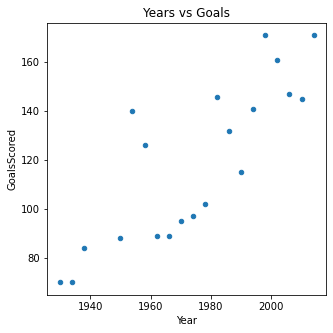

In [90]:
progression.plot(
    kind = 'scatter',
    x = 'Year',
    y = 'GoalsScored',
    title = 'Years vs Goals',
    figsize = (5,5)
)

Looking at the scatter plot there seems to be a strong relationship over the amount of goals being scored as the years progress. There is some degree of linearity that can be oberseved. Instead of roughly guessing lets a draw line of best fit to determine if this is true qualitatively. 

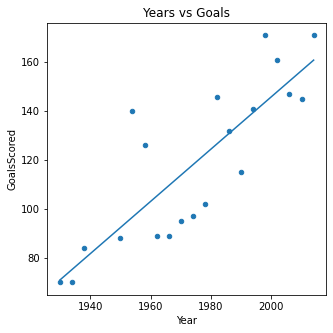

In [91]:
#sane graph as above we want them on the same plane
progression.plot(
    kind = 'scatter',
    x = 'Year',
    y = 'GoalsScored',
    title = 'Years vs Goals',
    figsize = (5,5)
)
#formula for calculating the line of best fit
x = progression["Year"]
y = progression["GoalsScored"]
#using numpy to help return the calculated vectors
a , b = np.polyfit(x,y,1)
#apply the formula and plot
plt.plot(x, a*x + b)

After observing the line of best plotted it safe to say that there is a linear relationship between the amount of years measured against the amount goals scored.

**Q2: Find the top 5 years that had the most attendance during the World Cup**

In [92]:
#Using the world cup dataset to calculate the top 5 highest attendance
highest_attendance = world_cups_df

highest_attendance = highest_attendance[["Year","Attendance"]].sort_values(by = 'Attendance', ascending = False).head(5)
highest_attendance

,Year,Attendance
14,1994,3587538
19,2014,3386810
17,2006,3359439
18,2010,3178856
15,1998,2785100


<AxesSubplot:title={'center':'Highest Year Attendances'}, xlabel='Year'>

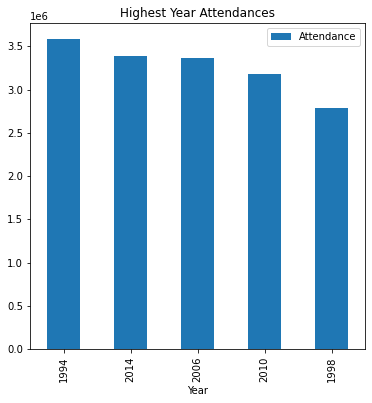

In [93]:
highest_attendance.plot(kind = 'bar',
                        x = 'Year',
                        y = 'Attendance',
                        title = 'Highest Year Attendances',
                        figsize = (6,6))

**Q3: Find the top 3 countries had the most apperances and how many away goals have they accumulated?**

To answer this question we shoud look to use the matches dataframe that has all the data we need in there

In [94]:
#temp dataframe again
temp_appearance = world_cup_matches_df
#count the amount of times a team appears to play a home game and away game
home_appearance = temp_appearance["Home Team Name"].value_counts()
away_appearance = temp_appearance["Away Team Name"].value_counts()
#add both variables to obtain the total number of apperances for each country
total_appearance = home_appearance + away_appearance
#view the total appearances
total_appearance

Algeria                 12.0
Angola                   3.0
Argentina               81.0
Australia               13.0
Austria                 29.0
                        ... 
United Arab Emirates     3.0
Uruguay                 52.0
Wales                    5.0
Yugoslavia              37.0
Zaire                    3.0
Length: 78, dtype: float64

In [95]:
#select the columns we need to calculate the number of away goals
away_goals = temp_appearance[["Away Team Name", "Away Team Goals"]]
away_goals = away_goals.groupby(["Away Team Name"]).agg({"Away Team Goals" : ['sum']})

In [96]:
print(away_goals.to_string())

                     Away Team Goals
                                 sum
Away Team Name                      
Algeria                          7.0
Angola                           1.0
Argentina                       22.0
Australia                        4.0
Austria                         12.0
Belgium                         27.0
Bolivia                          0.0
Bosnia                           1.0
Brazil                          45.0
Bulgaria                        11.0
Cameroon                         7.0
Canada                           0.0
Chile                           16.0
China                            0.0
Colombia                        18.0
Costa Rica                      11.0
Croatia                         18.0
Cuba                             0.0
Czechia                          3.0
Czechoslovakia                  17.0
C�te d'Ivoire                    8.0
Denmark                         14.0
Dutch East Indies                0.0
Ecuador                          6.0
E

In [97]:
#create a variable to host all the values of the aways goals scored by each country through the iterator
final_away_goals = []
for x in away_goals['Away Team Goals']['sum']:
    final_away_goals.append(x)
#we dont need to worry about the indexing of the values as they are in the same position
final_away_goals

[7.0,
 1.0,
 22.0,
 4.0,
 12.0,
 27.0,
 0.0,
 1.0,
 45.0,
 11.0,
 7.0,
 0.0,
 16.0,
 0.0,
 18.0,
 11.0,
 18.0,
 0.0,
 3.0,
 17.0,
 8.0,
 14.0,
 0.0,
 6.0,
 3.0,
 1.0,
 25.0,
 40.0,
 69.0,
 9.0,
 2.0,
 2.0,
 1.0,
 14.0,
 2.0,
 4.0,
 0.0,
 8.0,
 1.0,
 29.0,
 2.0,
 7.0,
 17.0,
 2.0,
 36.0,
 9.0,
 40.0,
 3.0,
 8.0,
 8.0,
 6.0,
 16.0,
 6.0,
 17.0,
 7.0,
 15.0,
 14.0,
 6.0,
 14.0,
 4.0,
 4.0,
 2.0,
 2.0,
 4.0,
 42.0,
 21.0,
 23.0,
 1.0,
 0.0,
 2.0,
 10.0,
 19.0,
 4.0,
 2.0,
 18.0,
 2.0,
 18.0,
 0.0]

In [98]:
#string it all together by creating a new dataframe to host the amount of apperances and away goals
#use total_appearance because it has the index for the country name
df_q3 = pd.DataFrame(total_appearance)
df_q3 = df_q3.rename(columns ={0 : 'World Cup Apperances'})
df_q3['Total Away Goals'] = final_away_goals
#sort by the largest amount of world cup apperances
df_q3 = df_q3.sort_values(by = 'World Cup Apperances', ascending = False).head(3)
df_q3

,World Cup Apperances,Total Away Goals
Germany,114.0,69.0
Brazil,108.0,45.0
Italy,83.0,29.0


The top 3 World Cup Appeances are from Germany, Brazil and Italy respectively.  

<AxesSubplot:ylabel='World Cup Apperances'>

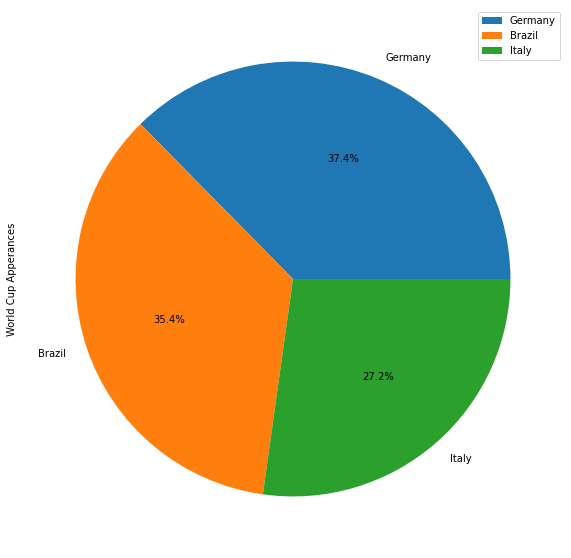

In [99]:
labels = ['Germany', 'Brazil', 'Italy']
df_q3.reset_index().plot(kind = 'pie', 
                        y = 'World Cup Apperances', 
                        labels = labels, 
                        legend = 3,
                        autopct='%1.1f%%', 
                        figsize = (10,10))

**Q4: Find the amount of World Cups won by each country and plot it using a bar graph. Then create a pie graph illustrating the winrate (in %) for each country.**

In [100]:
#formula for winrate = (world cups won / total world cups ) x 100
world_cups_df.shape

(20, 10)

In [101]:
#we can see that there are 20 rows of entries for world cups leading up to 2014
total_world_cups = 20

In [102]:
country_labels = ["Brazil", "Italy", "Germany", "Uruguay", "Argentina", "England", "France", "Spain"]
country_wins = world_cups_df["Winner"].value_counts()
country_wins = (country_wins/total_world_cups)*100
country_wins 

Brazil       25.0
Italy        20.0
Germany      20.0
Uruguay      10.0
Argentina    10.0
England       5.0
France        5.0
Spain         5.0
Name: Winner, dtype: float64

<AxesSubplot:ylabel='Winner'>

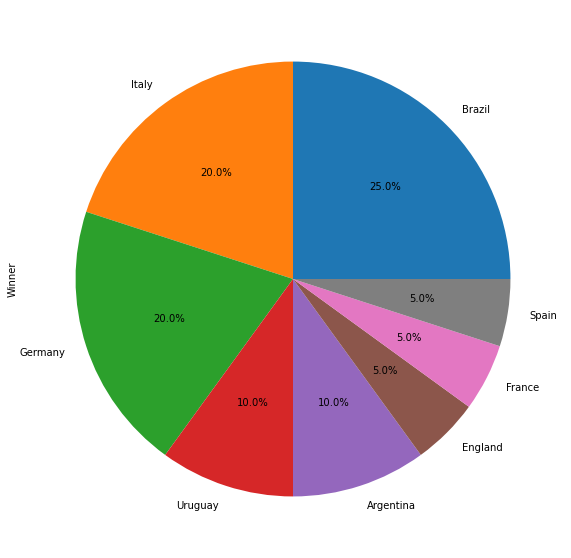

In [103]:
country_wins.plot(kind = 'pie',
                  labels = country_labels,
                  autopct='%1.1f%%',
                  figsize = (10,10))

**Q5: How likely is it for the home country to win a game during the World Cup. Qualitatively and quantitavely provide the likelihood of a win, loss and draw**

For this particular question we need to be able to figure which team has won which game in each match game played. There a few methods in which we are able to do this but the approach that is going to be taken is to tranpose the home goals and away goals column against each other.

In [104]:
#looping through the away and home goals column in the data frame
home_goals = []
away_goals = []
#pass each value into a seperate list
for x in world_cup_matches_df["Home Team Goals"]:
    home_goals.append(x)
for x in world_cup_matches_df["Away Team Goals"]:
    away_goals.append(x)

In [105]:
#host the values in a skeleton frame for our new dataset to be created
frame = {'Home Goals': home_goals, 'Away Goals': away_goals}
df = pd.DataFrame(frame)
df
#contains the correct about of rows to ensure that all values are counted for

,Home Goals,Away Goals
0,4.0,1.0
1,3.0,0.0
2,2.0,1.0
3,3.0,1.0
4,1.0,0.0
...,...,...
845,0.0,0.0
846,1.0,7.0
847,0.0,0.0
848,0.0,3.0


In [106]:
#create a list of conidtions we need to check for in determining the outcome of the game
conditions = [(df["Home Goals"] > df["Away Goals"]),
              (df["Home Goals"] < df["Away Goals"]),
              (df["Home Goals"] == df["Away Goals"])]
#using the same index as the conditions create the desired output when equated
values = ['Home Won', 'Away Won', 'Draw']
#using numpy to save our new appeneded columns values based on the conditions it passess through
df["Outcome"] = np.select(conditions, values)
df

,Home Goals,Away Goals,Outcome
0,4.0,1.0,Home Won
1,3.0,0.0,Home Won
2,2.0,1.0,Home Won
3,3.0,1.0,Home Won
4,1.0,0.0,Home Won
...,...,...,...
845,0.0,0.0,Draw
846,1.0,7.0,Away Won
847,0.0,0.0,Draw
848,0.0,3.0,Away Won


In [107]:
#check to see the overall 
df["Outcome"].value_counts()

Home Won    486
Draw        190
Away Won    174
Name: Outcome, dtype: int64

In [108]:
total_matches = 850
label = ['Home Won', 'Draw', 'Away Won']
pie = (df["Outcome"].value_counts()/total_matches) * 100
pie

Home Won    57.176471
Draw        22.352941
Away Won    20.470588
Name: Outcome, dtype: float64

Quantitatively we can see that if you are likely to play a home game you have a 57.2% chance of winning. The likelihood of draw and lost are 22.4% and 20.1% respectively

Qualitative illustration:

<AxesSubplot:ylabel='Outcome'>

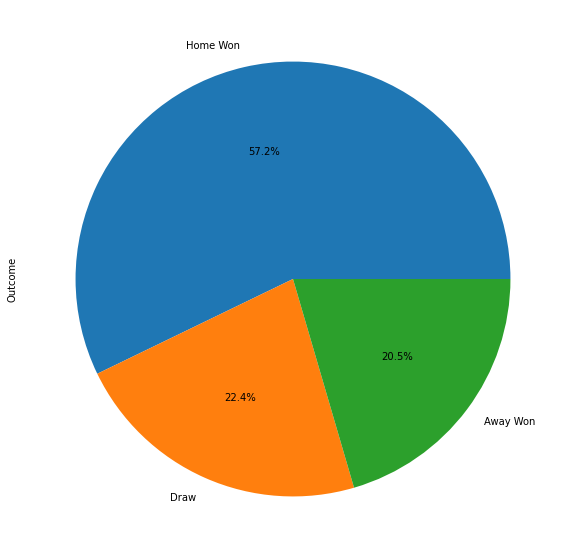

In [109]:
pie.plot(
    kind = 'pie',
    autopct='%1.1f%%',
    figsize = (10,10),
    labels = label
)

**Q6: Find the top 3 countries that has the highest amount of top 4 final finishes and for each respective top country find which player has scored the most goals.**

We need to use the world cups data set to calculate every participating countries top 4 finishes. From there we need to sort the data by descending order to take the top 3 values to figure out which country we need to filter out the players data set for in calculating how many goals has been scored by the highest player. 

In [110]:
#quick look at which columns we need to use
world_cups_df.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607


In [111]:
#count the values of each country mentioned in each column that represents a level of finish
first = world_cups_df["Winner"].value_counts()
second = world_cups_df["Runners-Up"].value_counts()
third = world_cups_df["Third"].value_counts()
fourth = world_cups_df["Fourth"].value_counts()
#add them all together to get the total
top_finishes = first + second + third + fourth

In [112]:
#drop all countries that dont have any finishes and take the top 3 values.
top_finishes.dropna().sort_values(ascending = False).head(3)

Germany    13.0
Brazil     11.0
Italy       8.0
dtype: float64

Top 3 countries with the highest top 4 finishes are Germany, Brazil and Italy. We now need to filter these countries in the players dataset to calculate which particular player scored the most amount of goals for the country.

In [113]:
world_cup_players_df.head()

,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
RoundID,,,,,,,,
201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


Taking a look within the "Event" column shows us that the data has been aggregated with other types of data. A player that has scored a goal within a game will also have it showned that they have been subbed off for instance. We need to split this column into goals scored to be able to calculate this.

In [114]:
#create a temp_df to maintain integrity of the original dataset again, choosing only specific columns
temp_df = world_cup_players_df[["Team Initials", "Player Name", "Event"]]
temp_df.head()

,Team Initials,Player Name,Event
RoundID,,,
201,FRA,Alex THEPOT,NaN
201,MEX,Oscar BONFIGLIO,NaN
201,FRA,Marcel LANGILLER,G40'
201,MEX,Juan CARRENO,G70'
201,FRA,Ernest LIBERATI,NaN


In [115]:
#goals in football and within this dataset are represented by a P for penalties and a G for a regular goal.
#create an array to store the values to append to from a loop
goals = []
#loop through the column and convert it into a string to be able to use the count method
for x in temp_df["Event"].astype('str'):
#count how many times P and G are in each value and save it to a total variable
    total_goals = x.count('P') + x.count('G')
#append it
    goals.append(total_goals)

temp_df["Goals Scored"] = goals

/tmp/ipykernel_33/4143904781.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["Goals Scored"] = goals


In [116]:
#warning error, check to see if the column has been appended and the values are correct
temp_df.head()

,Team Initials,Player Name,Event,Goals Scored
RoundID,,,,
201,FRA,Alex THEPOT,NaN,0
201,MEX,Oscar BONFIGLIO,NaN,0
201,FRA,Marcel LANGILLER,G40',1
201,MEX,Juan CARRENO,G70',1
201,FRA,Ernest LIBERATI,NaN,0


In [117]:
#drop the "Events" column since we arent interested in it anymore
temp_df2 = temp_df.drop(["Event"], axis =1)

In [118]:
#start calculating the highest scoring player by the top 3 countries
Germany = temp_df2[temp_df2["Team Initials"] == 'GER']
ger_top_scorer = Germany.groupby(["Team Initials", "Player Name"]).agg(goal_sum = ('Goals Scored', sum))

In [119]:
#checking the groupby if it has aggregated correctly
ger_top_scorer

goal_sum
Team Initials Player Name              
GER           AOGO                    0
              ASAMOAH                 0
              Albin KITZINGER         0
              Andreas BREHME          0
              Andreas KOEPKE          0
...                                 ...
              Willy BUSCH             0
              W�RNS                   0
              ZIEGE                   0
              ZIELER                  0
              �ZIL                    3

[138 rows x 1 columns]

In [120]:
#reset the index
ger_top_scorer = ger_top_scorer.reset_index()
#sort values by goals descendingly
ger_top_scorer.sort_values(by = 'goal_sum', ascending = False).head(2)

,Team Initials,Player Name,goal_sum
66,GER,KLOSE,17
90,GER,M�LLER,12


For Germany Klose has scored the most amount of goals for his country.

In [121]:
#do the same to Brazil and Italy
Brazil = temp_df2[temp_df2["Team Initials"] == 'BRA']
bra_top_scorer = Brazil.groupby(["Team Initials", "Player Name"]).agg(goal_sum = ('Goals Scored', sum))

In [122]:
bra_top_scorer = bra_top_scorer.reset_index()
bra_top_scorer.sort_values(by = 'goal_sum', ascending = False).head(2)

,Team Initials,Player Name,goal_sum
259,BRA,RONALDO,15
226,BRA,PEL� (Edson Arantes do Nascimento),12


For Brazil Ronaldo has scored the most amount of goals for his country

In [123]:
Italy = temp_df2[temp_df2["Team Initials"] == 'ITA']
ita_top_scorer = Italy.groupby(["Team Initials", "Player Name"]).agg(goal_sum = ('Goals Scored', sum))

In [124]:
#ita_top_scorer = ita_top_scorer.reset_index()
ita_top_scorer.sort_values(by = 'goal_sum', ascending = False).head(2)

goal_sum
Team Initials Player Name                  
ITA           Paolo ROSSI                 9
              Salvatore SCHILLACI         6

For Italy, Paolo Rossi has scored the most goals for his country

__Conclusion & Further Applications__

From the initial data inspections commenced to the answers that were dervied from the questions posed; There are few key points that we can conclude from this analysis that has been conducted. 

Overall the results from the first inital question has posed some interesting points about the evolution of football using the world cup as a basis for this evalutation. Throughout the years it was shown that the number of goals that have been scored within each tournament had a gradual increase. This can be interpreted in many ways such as the level of skill developing within football has been increasing over time or through question 3 it was the tactics that have been deployed within the team. Questions 3 highlighted which teams were able to consistently win more than one world cup which poses the question yet again, "is the same talent being retained for more than 12 years straight or is it the coaching system". Most professional footballers cannot maintain themselves and their bodies to play at a high professional level for 3 world cup spanning within 12 years coming. 

There are a few factors that determine the performance of a country during the world cup. One particular factor was explored within question 5 that looked into the all the possible outcomes of a game if you were the host of the tournament. Hosting a tournament had a significant effect in determining the outcome of a match as it had lead the hosting team a favoured 57.2% chance of winning their respecitve match. Losing a game as the home team is almost 3 times unlikely then winning a game. Having the local populace spectate a home games will almost certaintly allow a team to preform significantly better. Drawing having a higher chance than losing is more of a stronger indication to portray how important it is for a country to host the world cup if they want to increase their chances of winning it all.

The cleaning process of the data sets could have been done alot more effciently. Instead of looping through particular columns to change their values, functions could have been created and applied onto it. Not only will this result in more cleaner code it will also allow the functions to be more modular in nature if it needed to be used later one for more preprocessing. Furthermore, for even more cleaner data, the player's name could have been altered to allow for special characters to make the data appear alot more presentable than it initially was but altering thousands of names to ensure they are correct is a time strenuous process.

Currently a small limitation of the dataset is the missing data from the 2018 World Cup hosted in Russia. Having these results present in the dataset could make for a lot more accurate conclusions being drawn about the tournament itself. These values could provide a greater understanding of the upcoming World Cup in Qatar this year. Qatar is making its second World Cup appearance and as the hosts will they be able to make a top 4 finish? The conclusions could be more accurate if the 2018 World Cup data was added in as further study. 

__Bibliography__

* Kaggle.com. 2022. FIFA World Cup. [online] Available at: <https://www.kaggle.com/datasets/abecklas/fifa-world-cup?datasetId=19728&sortBy=voteCount&select=WorldCupPlayers.csv> [Accessed 10 April 2022].
* Livesport.com. 2022. World Cup Scores / Results | Livesport.com. [online] Available at: <https://www.livesport.com/en/soccer/world/world-cup/results/> [Accessed 12 April 2022].
* Zach, V., 2022. How to Plot Line of Best Fit in Python (With Examples) - Statology. [online] Statology. Available at: <https://www.statology.org/line-of-best-fit-python/> [Accessed 13 April 2022].
